In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [10]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object and fit the data
reg = LinearRegression().fit(df[["Ground Temperature"]], df["Chirps/Second"])

# Print the coefficients
Intercept = reg.intercept_
Slope = reg.coef_
print("Intercept: ", reg.intercept_)
print("Slope: ", reg.coef_)
# print(Slope)
# print(Intercept)



Intercept:  0.4593146452359598
Slope:  [0.20299973]


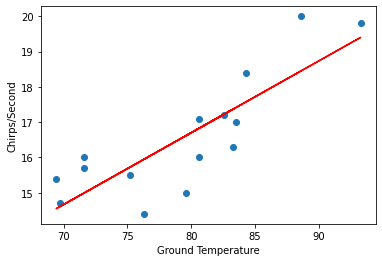

In [11]:
# import matplotlib.pyplot as plt
plt.scatter(df["Brain"], df["Chirps/Second"])
plt.plot(df["Ground Temperature"], Slope*df["Ground Temperature"] + Intercept, '-r')
plt.xlabel("Ground Temperature")
plt.ylabel("Chirps/Second")
plt.show()


In [12]:
# R^2 score
r_squared = reg.score(df[["Ground Temperature"]], df["Chirps/Second"])
print("R^2 score: ", r_squared)



R^2 score:  0.6922946529147004


In [13]:
# Predict chirp frequency at ground temperature of 95
predicted_chirp_frequency = reg.predict([[95]])
print("Predicted chirp frequency at 95 degree: ", predicted_chirp_frequency)

# Predict ground temperature at 18 chirps per second
predicted_ground_temp = reg.intercept_ + reg.coef_*18
print("Predicted ground temperature at 18 chirps per second: ", predicted_ground_temp)

Predicted chirp frequency at 95 degree:  [19.74428913]
Predicted ground temperature at 18 chirps per second:  [4.11330981]


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [15]:
df = pd.read_fwf("brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [16]:
# LinearRegression
reg = LinearRegression().fit(df[["Brain"]], df["Body"])

Intercept = reg.intercept_
Slope = reg.coef_
print("Intercept: ", reg.intercept_)
print("Slope: ", reg.coef_)

Intercept:  91.00439620740681
Slope:  [0.96649637]


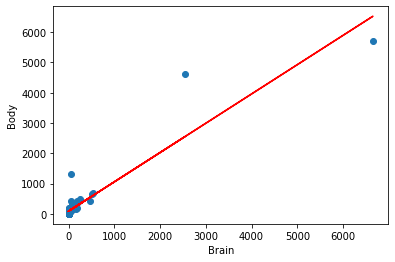

In [17]:
plt.scatter(df["Brain"], df["Body"])
plt.plot(df["Brain"], Slope*df["Brain"] + Intercept, '-r')
plt.xlabel("Brain")
plt.ylabel("Body")
plt.show()

In [18]:
# R^2 score
r_squared = reg.score(df[["Brain"]], df["Body"])
print("R^2 score: ", r_squared)

R^2 score:  0.8726620843043331


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [19]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [21]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [34]:
# LinearRegression 
X = df[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']]
y = df['Salary']
reg = LinearRegression().fit(X, y)
print("Intercept: ", reg.intercept_)
print("Coefficients: ", reg.coef_)

Intercept:  11410.146547255616
Coefficients:  [ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354]


In [27]:
# R^2 score

print('R^2 Score: ', reg.score(X, y))

R^2 Score:  0.8547180674410969


In [33]:
# print(reg.coef_)

In [32]:
#3.
Corr = df.corr()
Corr["Sex"].sort_values(ascending=False)

Sex       1.000000
Degree    0.077112
YSdeg    -0.088288
Rank     -0.230411
Salary   -0.252782
Year     -0.379404
Name: Sex, dtype: float64